In [9]:
import pandas as pd

In [10]:
aqi_df=pd.read_csv('city_day.csv')
aqi_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [11]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [12]:
aqi_df['Date'] # data type is not date format

0        2015-01-01
1        2015-01-02
2        2015-01-03
3        2015-01-04
4        2015-01-05
            ...    
29526    2020-06-27
29527    2020-06-28
29528    2020-06-29
29529    2020-06-30
29530    2020-07-01
Name: Date, Length: 29531, dtype: object

In [13]:
# converting to date
aqi_df['Date']=pd.to_datetime(aqi_df.Date)
aqi_df['Date']

0       2015-01-01
1       2015-01-02
2       2015-01-03
3       2015-01-04
4       2015-01-05
           ...    
29526   2020-06-27
29527   2020-06-28
29528   2020-06-29
29529   2020-06-30
29530   2020-07-01
Name: Date, Length: 29531, dtype: datetime64[ns]

In [14]:
# Making a separate column for year and month
aqi_df['year']=pd.DatetimeIndex(aqi_df.Date).year
aqi_df['month']=pd.DatetimeIndex(aqi_df.Date).month
aqi_df[['month','year']]

,month,year
0,1,2015
1,1,2015
2,1,2015
3,1,2015
4,1,2015
...,...,...
29526,6,2020
29527,6,2020
29528,6,2020
29529,6,2020


In [15]:
# Filling the empty columns with median
df1 = aqi_df.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('Moderate')

In [17]:
#Removing outliers using Z-score
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(df1))
df1 = df1[(z<3).all(axis=1)]
df1.shape

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
 16  year        29531 non-

In [ ]:
# Preprocessing
# Converting categorical data to numeric data
from sklearn.preprocessing import LabelEncoder
categorical_attributes = list(df1.select_dtypes(include=['object']).columns) #Prints the categorical attributes
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['AQI_Bucket']=le.fit_transform(df1['AQI_Bucket'].astype(str))
df1.info()

categorical_attributes ['City', 'AQI_Bucket']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  int32         
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-nu

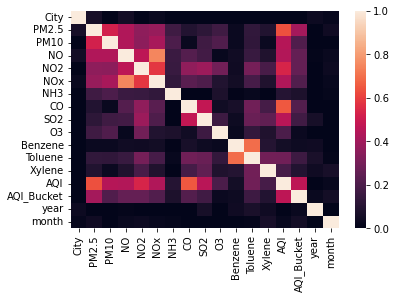

In [ ]:
df1.corr() #Find the corelation between columns
import seaborn as sns 
ax=sns.heatmap(df1.corr(), vmin=0, vmax=1)

### Train test split
The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. This method is a fast and easy procedure to perform such that we can compare our own machine learning model results to machine results.

In [ ]:
# 
from sklearn.model_selection import train_test_split
y = df1["AQI_Bucket"]
x = df1[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
# Spliting the data into 70:30 for training and testing respectively
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) 

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression

It is used in statistical software to understand the relationship between the dependent variable and one or more independent variables by estimating probabilities using a logistic regression equation. This type of analysis can help you predict the likelihood of an event happening or a choice being made.

In [ ]:
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(X_train, y_train)
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(X_test)
#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))

Accuracy of logistic regression classifier ::  0.7707674943566591


c:\Users\KHEDKAR\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Knearest neighbour

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In [ ]:
#K Neighbours Classifier
knc =  KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred_knc = knc.predict(X_test)
print("Accuracy of K-Neighbours classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))

Accuracy of K-Neighbours classifier ::  0.9469525959367946


In [ ]:
# Using Random forest classifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy of Random Forest Classifier ::  0.9993227990970655
